<a href="https://colab.research.google.com/github/Manu-Anand/tf_certfication/blob/master/GMM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
#print(X)
X = X[:, ::-1] # flip axes for better plotting
print(X)

[[ 6.48826703e+00  2.50064460e-01]
 [ 2.52194722e+00 -2.69798647e+00]
 [ 3.06877291e+00 -2.90007604e+00]
 [ 4.31427482e+00  7.02950576e-01]
 [ 2.38449945e+00 -2.53563494e+00]
 [ 7.80540956e+00 -1.70297829e+00]
 [ 8.38773426e-01  2.22322228e+00]
 [ 4.17614316e+00  7.93137001e-03]
 [ 3.02668532e+00 -1.79041773e+00]
 [ 1.26987864e+00  1.76747403e+00]
 [ 7.81974467e+00 -9.49424332e-01]
 [ 1.87335276e-01  2.51921931e+00]
 [ 3.43116792e+00  2.33812285e+00]
 [ 3.39806103e+00 -2.39482483e+00]
 [ 2.95679593e+00 -7.91981675e-01]
 [ 1.13171965e+00  3.22881491e+00]
 [ 1.59701749e+00 -1.80822253e+00]
 [ 4.09867867e-01  1.62350489e+00]
 [ 3.89290127e+00  1.21767506e+00]
 [ 3.54666555e+00 -1.22768985e+00]
 [ 3.53554556e+00 -1.06406044e+00]
 [ 2.66329169e+00 -2.07216196e+00]
 [ 7.15134224e+00 -1.95483315e+00]
 [ 4.68480619e+00  1.07627418e+00]
 [ 4.78526116e+00  8.15468056e-01]
 [ 7.10913422e+00 -2.11521989e+00]
 [ 7.23773243e+00 -6.27609843e-01]
 [ 3.26801777e+00  4.88382309e-01]
 [ 4.49395289e+00  1

[1 0 0 3 0 1 2 3 0 2 1 2 3 0 0 2 0 2 3 0 0 0 1 3 3 1 1 3 3 2 3 3 0 3 0 1 2
 3 2 3 0 1 2 3 2 1 2 2 2 1 1 1 0 1 1 0 3 2 2 0 2 2 2 2 3 0 2 3 0 1 0 3 0 1
 2 0 3 0 1 0 0 3 2 1 3 0 0 3 0 2 0 2 3 0 0 1 3 2 2 2 1 2 3 3 0 1 3 1 2 0 0
 0 3 0 1 2 1 0 1 1 2 0 2 1 3 1 2 2 2 3 1 1 1 0 3 0 1 3 1 0 3 0 0 1 0 2 3 0
 2 0 2 3 2 3 1 0 2 0 0 0 3 0 1 0 0 1 2 2 0 1 1 1 1 2 2 2 3 0 3 1 3 1 0 3 1
 0 1 3 3 1 3 3 1 0 1 1 1 2 2 3 3 0 2 2 1 3 0 1 3 1 3 3 2 2 1 2 3 1 2 1 0 3
 1 0 0 0 2 1 3 1 3 0 3 3 1 2 0 2 3 0 2 3 3 1 2 3 1 3 2 0 0 2 0 3 1 1 3 3 2
 1 3 0 0 0 1 3 3 3 3 3 2 3 3 1 0 2 1 2 2 2 1 2 2 1 1 1 2 3 2 3 2 0 3 2 0 3
 2 2 3 0 1 1 3 1 2 2 3 1 1 2 2 3 1 3 2 3 2 1 0 0 2 0 3 0 0 1 0 1 2 0 1 2 1
 3 0 3 0 2 3 2 1 2 2 2 2 1 2 0 2 0 2 3 1 0 2 2 3 0 0 1 1 1 0 3 2 3 0 2 0 1
 0 3 3 0 1 3 1 1 0 1 0 1 3 3 3 0 1 1 1 1 0 1 3 2 2 3 3 2 0 2]


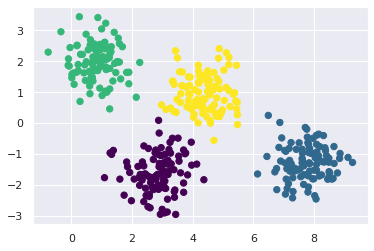

In [4]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    print(centers)
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

[[ 2.84849883 -1.61366997]
 [ 7.75608144 -1.2689694 ]
 [ 0.83945671  1.95662677]
 [ 4.36874542  0.95041055]]


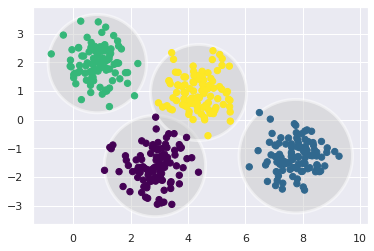

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled: These two disadvantages of k-means—its lack of flexibility in cluster shape and lack of probabilistic cluster assignment—mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope.

[[-5.48072174  5.28698509]
 [-0.67352972  1.35393896]
 [-3.1929741   3.73350187]
 [-1.99320416  1.59999263]]


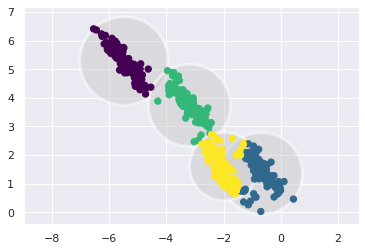

In [14]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

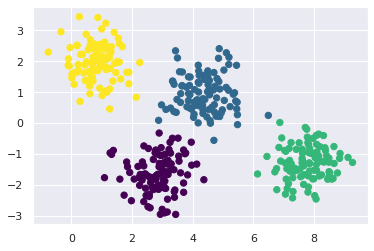

In [17]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [22]:
probs = gmm.predict_proba(X)
print('LABELS:     ', labels)
print('PROBS:     ', probs[:5].round(3))
# Prints probabilities of first 5 points

LABELS:      [1 0 0 1 0 2 3 1 0 3 2 3 1 0 0 3 0 3 1 0 0 0 2 1 1 2 2 1 1 3 1 1 0 1 0 2 3
 1 3 1 0 2 3 1 3 2 3 3 3 2 2 2 0 2 2 0 1 3 3 0 3 3 3 3 1 0 3 1 0 2 0 1 0 2
 3 0 1 0 2 0 0 1 3 2 1 0 0 1 0 3 0 3 1 0 0 2 1 3 3 3 2 3 1 1 0 2 1 2 3 0 0
 0 1 0 2 3 2 0 2 2 3 0 3 2 1 2 3 3 3 1 2 2 2 0 1 0 2 1 2 0 1 0 0 2 0 3 1 0
 3 0 3 1 3 1 2 0 3 0 0 0 1 0 2 0 0 2 3 3 0 2 2 2 2 3 3 3 1 0 1 2 1 2 0 1 2
 0 2 1 1 2 1 1 2 0 2 2 2 3 3 1 1 0 3 3 2 1 0 2 1 2 1 1 3 3 2 3 1 2 3 2 0 1
 2 0 0 0 3 2 1 2 1 0 1 1 2 3 0 3 1 0 3 1 1 2 3 1 2 1 3 0 0 3 0 1 2 2 1 1 3
 2 1 0 0 0 2 1 1 1 1 1 3 1 1 2 0 3 2 3 3 3 2 3 3 2 2 2 3 1 3 1 3 0 1 3 0 1
 3 3 1 0 2 2 1 2 3 3 1 2 2 3 3 1 2 1 3 1 3 2 0 0 3 0 1 0 0 2 0 2 3 0 2 3 2
 1 0 1 0 3 1 3 2 3 3 3 3 2 3 0 3 0 3 1 2 0 3 3 1 0 0 2 2 2 0 1 3 1 0 3 0 2
 0 1 1 0 2 1 2 2 0 2 0 2 1 1 1 0 2 2 2 2 0 2 1 3 3 1 1 3 1 3]
PROBS:      [[0.    0.537 0.463 0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

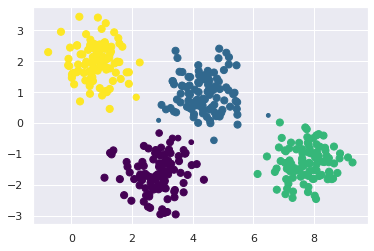

In [27]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Strectehd data well fits

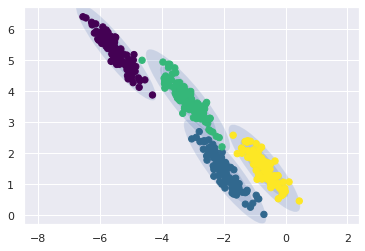

In [41]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

hough GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

As an example, consider some data generated from Scikit-Learn's make_moons function, which we saw in In Depth: K-Means Clustering:

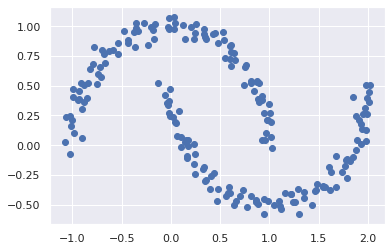

In [42]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

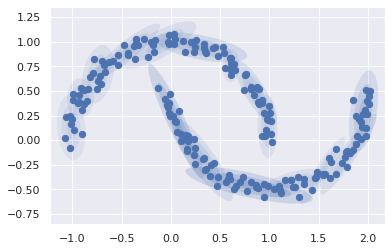

In [52]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

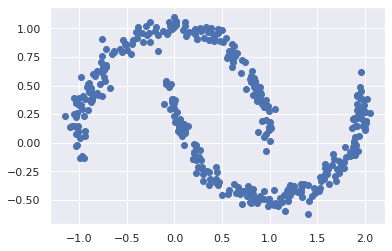

In [53]:
Xnew,labels = gmm16.sample(n_samples=400)
#print(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

DIGITS GENERATION

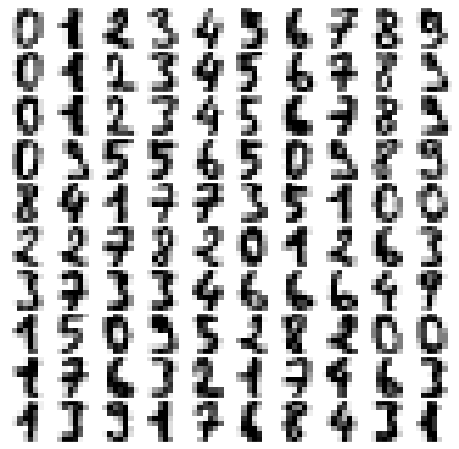

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Use PCA to reduce dimension since GMM wont be good at high dimensions

In [55]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

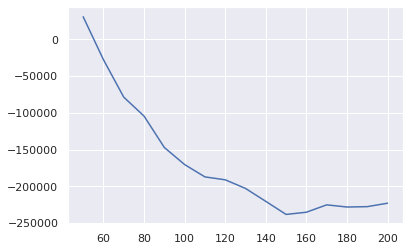

In [57]:
n_components = np.arange(50, 210, 10)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [58]:
gmm = mixture.GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [64]:
data_new,_ = gmm.sample(300)
data_new.shape

(300, 41)

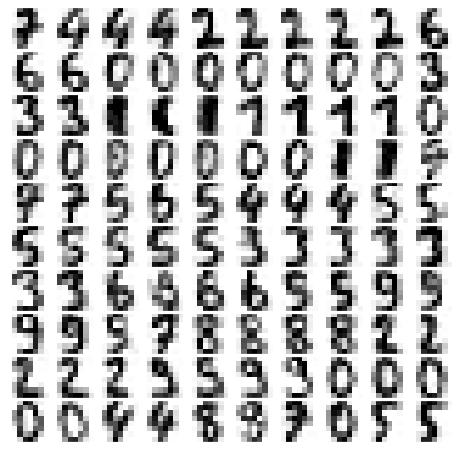

In [65]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)